# Historical S&P 500 analysis

## Import and combine data sets

In [1]:
# load packages
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
# LOAD DATA SETS 

# S&P 500 daily closing value 1986 - 2018
sp_old_raw = pd.read_csv('./data/sp500_to_29jun2018.csv')
# sp_old_raw = pd.read_csv('./data/SP.csv')


# S&P 500 daily closing value
sp_new_raw_temp1 = pd.read_csv('./data/sp500_to_9apr2020.csv')
sp_new_raw_temp2 = sp_new_raw_temp1[['Effective date ', 'S&P 500']]
sp_new_raw = sp_new_raw_temp2[sp_new_raw_temp2['Effective date '].notna()]

In [3]:
# recast date as datetime
# sp_old = pd.DataFrame({'date': pd.to_datetime(sp_old_raw['Date']),
#                        'close': sp_old_raw['Close']})

sp_old = pd.DataFrame({'date': pd.to_datetime(sp_old_raw['date']),
                       'close': sp_old_raw['close']})

sp_new = pd.DataFrame({'date': pd.to_datetime(sp_new_raw['Effective date ']),
                       'close': sp_new_raw['S&P 500']})

In [4]:
# combine old and new data sets
sp = pd.concat([sp_old, sp_new]).drop_duplicates().reset_index(drop=True)
# sp = sp_old

In [344]:
# # save combined data set
# sp.to_csv('./data/sp500_all.csv', index=False)

## Load combined S&P 500 data set

In [5]:
# # LOAD DATA SETS 

# # S&P 500 daily closing value Jan 1986 - Apr 2020
# sp = pd.read_csv('./data/sp500_all.csv')
sp[::1000]

,date,close
0,1986-01-02,209.59
1000,1989-12-14,350.93
2000,1993-11-29,461.90
3000,1997-11-11,923.78
4000,2001-11-05,1102.84
5000,2005-10-25,1196.54
6000,2009-10-15,1096.56
7000,2013-10-07,1676.12
8000,2017-09-26,2496.84


## Visualize S&P 500 data

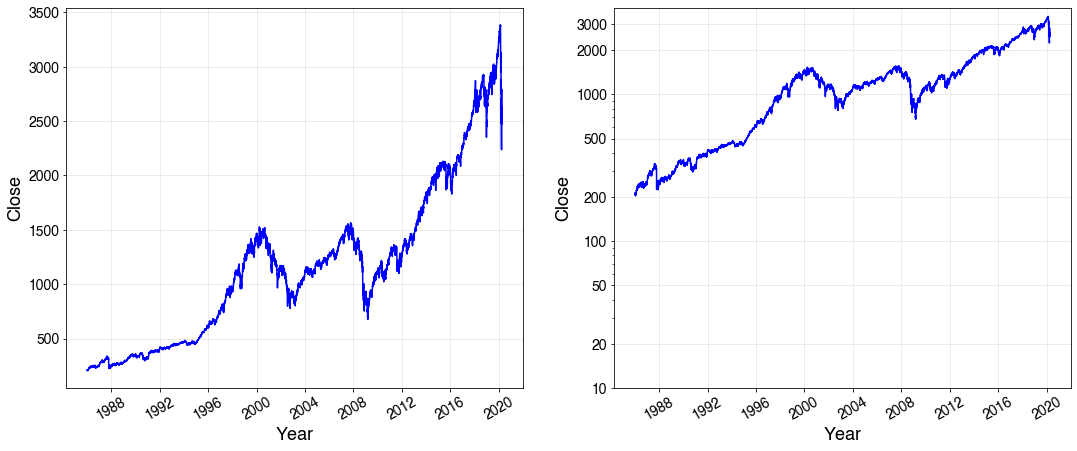

In [6]:
### PLOT S&P 500 data

# linear scale
fig, axes = plt.subplots(1, 2, figsize = (18,7))
x = sp['date']
y = sp['close']
axes[0].plot(x, y, 'blue')
axes[0].set_xlabel('Year', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[0].set_ylabel('Close', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')

# log scale
import matplotlib
axes[1].plot(x, y, 'blue')
axes[1].set_xlabel('Year', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_ylabel('Close', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_yscale('log')
axes[1].set_yticks([10, 20, 50, 100, 200, 500, 1000, 2000, 3000])
axes[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# set axis tick label properties
plt.setp(axes[0].get_xticklabels(), rotation=30, fontsize=14, fontname = 'Helvetica')
plt.setp(axes[1].get_xticklabels(), rotation=30, fontsize=14, fontname = 'Helvetica')
plt.setp(axes[0].get_yticklabels(), fontsize=14, fontname = 'Helvetica')
plt.setp(axes[1].get_yticklabels(), fontsize=14, fontname = 'Helvetica')

# turn grid on
axes[0].grid(color=(.9, .9, .9))
axes[1].grid(color=(.9, .9, .9))

figure_name = './images/sp_lin_log_2.png'

# plt.savefig(figure_name, dpi = 250)

plt.show()

In [7]:
sp_diffs = pd.DataFrame({'date': sp['date'],
                         'close': sp['close'],
                         'daily change': sp.diff()['close'],
                         'daily change pct': round(100*sp.diff()['close']/sp['close'],3),
                         'high to date': sp['close'].cummax(),
                         'off from high': round(100*(sp['close'] - sp['close'].cummax()) / sp['close'].cummax(),3)})

In [8]:
sp_diffs[:5]

,date,close,daily change,daily change pct,high to date,off from high
0,1986-01-02,209.59,NaN,NaN,209.59,0.000
1,1986-01-03,210.88,1.29,0.612,210.88,0.000
2,1986-01-06,210.65,-0.23,-0.109,210.88,-0.109
3,1986-01-07,213.80,3.15,1.473,213.80,0.000
4,1986-01-08,207.97,-5.83,-2.803,213.80,-2.727


In [9]:
# # filter out older data
year = 1986
# newerthan = pd.Timestamp(year, 1, 1, 12)
# sp_diffs = sp_diffs[sp_diffs['date'] > newerthan]
# sp_diffs[:5]

## Display daily changes

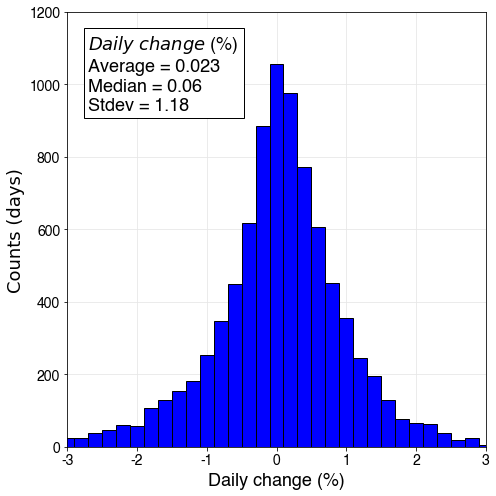

In [11]:
### PLOT HISTOGRAM OF DAILY CHANGES ###

# create textbox
data = sp_diffs['daily change pct'][1:]
average = np.nanmean(data)
median = np.nanmedian(data)
stdev = np.std(data)
props = dict(facecolor='white', edgecolor='none', alpha=0.67)
textbox = '$Daily$ $change$ (%%) \nAverage = %s \nMedian = %s \nStdev = %s' % (round(average,3), round(median,3), round(stdev,3))

from plotfunctions_1 import plot_hist
save=False
binwidth = 0.2
xmin = -3; xmax = 3
ymin = 0; ymax = 1200
xlabel = 'Daily change (%)'; ylabel = 'Counts (days)'
figure_name = './images/daily_changes_since_' + str(year) + '.png'
plot_hist(data, binwidth, textbox, props, xmin, xmax, ymin, ymax, xlabel, ylabel, save, figure_name)

In [12]:
# look at largest changes in either direction
big_drops = sp_diffs.sort_values('daily change pct')[:25]
big_gains = sp_diffs.sort_values('daily change pct', ascending=False)[:25]
# big_drops
# big_gains

In [13]:
# get daily changes (%) n-tiles
n = 5
change_quantiles = pd.DataFrame({'daily change': pd.qcut(sp_diffs['daily change pct'][1:], n).value_counts().sort_index().reset_index()['index'],
                             'counts': pd.qcut(sp_diffs['daily change pct'][1:], n).value_counts().sort_index().reset_index()['daily change pct']})
change_quantiles

,daily change,counts
0,"(-25.735000000000003, -0.611]",1730
1,"(-0.611, -0.105]",1726
2,"(-0.105, 0.227]",1727
3,"(0.227, 0.709]",1727
4,"(0.709, 10.378]",1728


## Histogram: number of days closing a given amount below record high

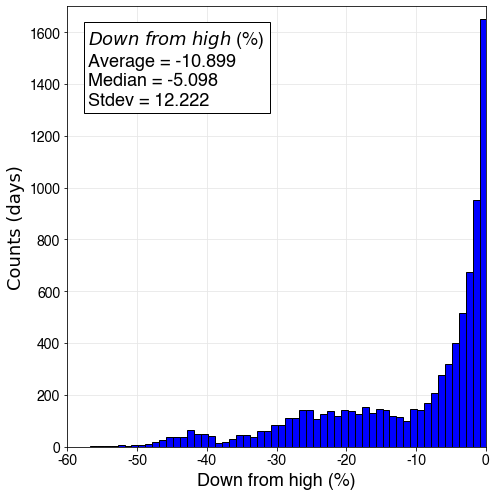

In [14]:
### PLOT HISTOGRAM OF PERCENT OFF HIGH ###

# create textbox
data = sp_diffs['off from high'][1:]
average = np.nanmean(data)
median = np.nanmedian(data)
stdev = np.std(data)
props = dict(facecolor='white', edgecolor='none', alpha=0.67)
textbox = '$Down$ $from$ $high$ (%%) \nAverage = %s \nMedian = %s \nStdev = %s' % (round(average,3), round(median,3), round(stdev,3))

from plotfunctions_1 import plot_hist
save=False
binwidth = 1
xmin = -60; xmax = 0
ymin = 0; ymax = 1700
xlabel = 'Down from high (%)'; ylabel = 'Counts (days)'
figure_name = './images/down_from_high_since_' + str(year) + '.png'
plot_hist(data, binwidth, textbox, props, xmin, xmax, ymin, ymax, xlabel, ylabel, save, figure_name)

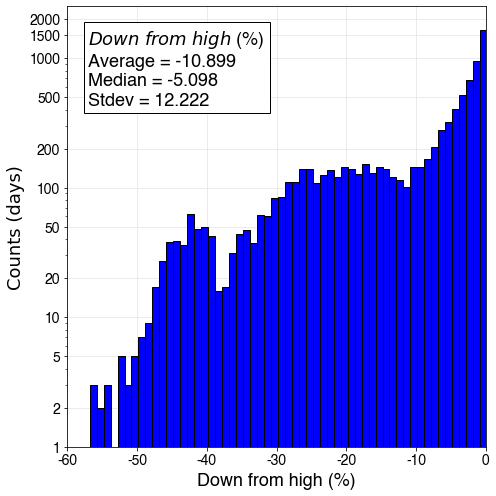

In [15]:
binwidth = 1
xmin = -60; xmax = 0
ymin = 0; ymax = 2500
yticks = [0, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 1500, 2000]
xlabel = 'Down from high (%)'; ylabel = 'Counts (days)'

from plotfunctions_1 import plot_hist_log_y
save=False
binwidth = 1
xlabel = 'Down from high (%)'; ylabel = 'Counts (days)'
figure_name = './images/down_from_high_log_since_' + str(year) + '.png'
plot_hist_log_y(data, binwidth, textbox, props, xmin, xmax, ymin, ymax, xlabel, ylabel, yticks, save, figure_name)

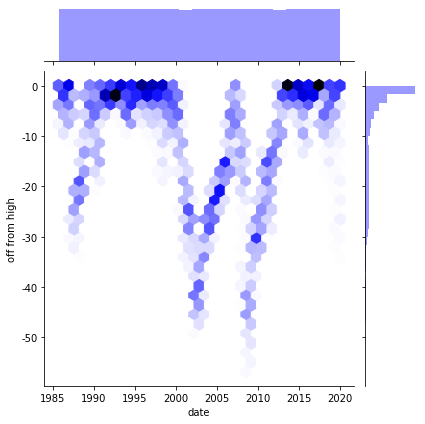

In [43]:
# joint plot: off from high vs. year
import seaborn as sns
import datetime as dt

# fig, ax = plt.subplots(1, 1, figsize = (7,7))
x = 2020 - (sp_diffs['date'].iloc[-1] - sp_diffs['date'][1:]).dt.days/365
y = sp_diffs['off from high'][1:]
g = sns.jointplot(x, y, kind="hex", color="blue")

# JointGrid has a convenience function
# g.set_axis_labels('x', 'y', rotation=0, fontsize=16, fontname = 'Helvetica')
# g.ax_joint.set_xticklabels(g.ax_joint.get_xmajorticklabels(), fontsize = 16)

# for tick in h.ax_joint.get_xticklabels(): 
#     tick.set_rotation(30)
#     tick.fontsize=18
#     tick.fontname='Helvetica'

# p.set_yticklabels(p.get_yticks(), size = 15)

# set axis tick label properties
# plt.setp(ax.get_xticklabels(), rotation=30, fontsize=14, fontname = 'Helvetica')
# plt.setp(ax.get_yticklabels(), fontsize=14, fontname = 'Helvetica')
plt.show()

In [ ]:
# get down range (% off) n-tiles with n = 10
off_quantiles = pd.DataFrame({'down range': pd.qcut(sp_diffs['off from high'][1:], 10).value_counts().sort_index().reset_index()['index'],
                             'counts': pd.qcut(sp_diffs['off from high'][1:], 10).value_counts().sort_index().reset_index()['off from high']})
# off_quantiles.iloc[0][0] = pd.Interval(left = -56.776, right = -29.004, closed='right')
off_quantiles

## Line graph: frequency of closing given amount below record high

In [44]:
# get fraction of closes below x% of record high

fract_pct_off = pd.DataFrame(columns=['percent off', 'fraction of days'])
for i in np.arange(0,58,0.1):
    pct_off = i
    fract_pct_off_temp = pd.DataFrame({'percent off': -i, 
                                      'fraction of days': 100*len(sp_diffs[sp_diffs['off from high'] <= -pct_off]) / len(sp_diffs)}, index=[0])
    
    fract_pct_off = fract_pct_off.append(fract_pct_off_temp, ignore_index=True)
    
fract_pct_off = fract_pct_off[::-1].reset_index().iloc[:,1:]

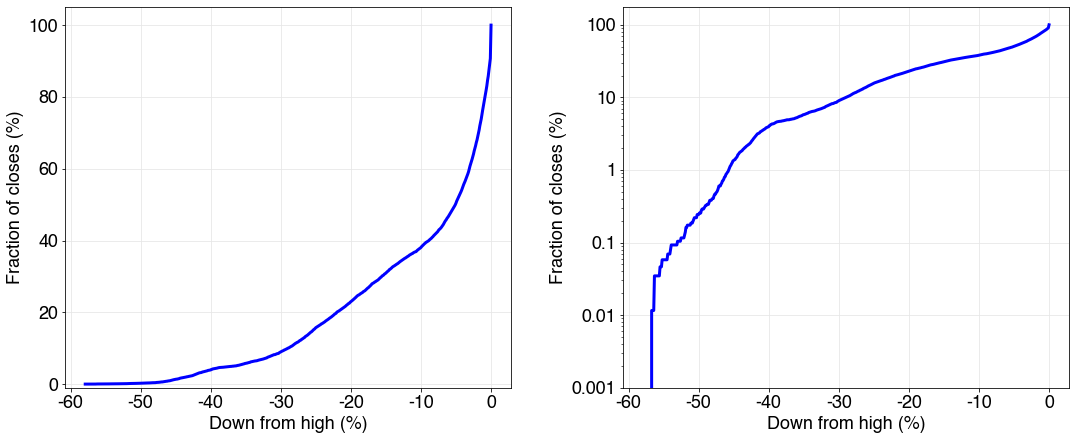

In [360]:
# plot line of close fraction vs. off %

### PLOT S&P 500 data

# linear scale
fig, axes = plt.subplots(1, 2, figsize = (18,7))
x = fract_pct_off['percent off']
y = fract_pct_off['fraction of days']
axes[0].plot(x, y, 'blue', linewidth=3)
axes[0].set_xlabel('Down from high (%)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[0].set_ylabel('Fraction of closes (%)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[0].set_ylim(-1,105)

# log scale
from matplotlib.ticker import FormatStrFormatter
axes[1].plot(x, y, 'blue', linewidth=3)
axes[1].set_xlabel('Down from high (%)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_ylabel('Fraction of closes (%)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_yscale('log')
axes[1].set_ylim(0.001,175)
axes[1].set_yticklabels(['', '0.001', '0.01', '0.1', '1', '10', '100'])

# set axis tick label properties
plt.setp(axes[0].get_xticklabels(), rotation=0, fontsize=18, fontname = 'Helvetica')
plt.setp(axes[1].get_xticklabels(), rotation=0, fontsize=18, fontname = 'Helvetica')
plt.setp(axes[0].get_yticklabels(), fontsize=18, fontname = 'Helvetica')
plt.setp(axes[1].get_yticklabels(), fontsize=18, fontname = 'Helvetica')

# turn grid on
axes[0].grid(color=(.9, .9, .9))
axes[1].grid(color=(.9, .9, .9))

figure_name = './images/fraction_closes_down_since' + str(year) + '.png'

plt.savefig(figure_name, dpi = 250)
plt.subplots_adjust(wspace=0.25)
plt.show()

In [54]:
# print table showing fraction of closes below x% of record high

fract_pct_off = pd.DataFrame(columns=['percent off', 'fraction of days (%)'])
for i in np.arange(0,60,5):
    pct_off = i
    fract_pct_off_temp = pd.DataFrame({'percent off': -i, 
                                      'fraction of days (%)': round(100*len(sp_diffs[sp_diffs['off from high'] <= -pct_off]) / len(sp_diffs), 2)}, index=[0])
    
    fract_pct_off = fract_pct_off.append(fract_pct_off_temp, ignore_index=True)
    
fract_pct_off = fract_pct_off[::-1].reset_index().iloc[:,1:]
fract_pct_off.style.hide_index()

percent off,fraction of days (%)
-55,0.06
-50,0.24
-45,1.35
-40,3.95
-35,5.78
-30,8.98
-25,15.72
-20,22.95
-15,30.94
-10,38.06


## Calculate return vs. buy strategy

### Buy throughout a dip

In [45]:
# define function to calculate price paid, shares purchased, avg share price, roi for given buy dates
def calc_return(dip, buy_dates):
    
    # sum up share prices to get price paid
    paid = int(buy_dates['close'].sum())
    
    # sum up number of shares bought to get average share price
    shares = len(buy_dates)
    avg_share_price = round(paid/shares, 2)
    
    # take current (last available) price as market value per share
    current_price = sp_diffs['close'].iloc[-1]
    
    # calculate total ROI and annualized ROI
    roi = 100*round((current_price - avg_share_price) / avg_share_price, 3)
    roi_annual = round(roi / (sp_diffs['date'].iloc[-1].year - sp_diffs['date'].iloc[0].year), 2)
    
    # create dataframe summarizing results
    out = pd.DataFrame({'dip': dip,
                        'paid': paid, 
                        'shares': shares,
                        'buy day fraction': 100*shares/len(sp_diffs),
                        'avg share price': avg_share_price, 
                        'current price': current_price, 
                        'ROI': roi, 
                        'ROI/y': roi_annual}, index=[0])
    
    return out

In [46]:
# baseline: buy every day
calc_return(0, sp_diffs)

,dip,paid,shares,buy day fraction,avg share price,current price,ROI,ROI/y
0,0,10064328,8639,100.0,1164.99,2789.82,139.5,4.1


In [47]:
# buy when discount exceeds n%
n = 15
discount_n = sp_diffs[sp_diffs['off from high'] < -n]
calc_return(n, discount_n)

,dip,paid,shares,buy day fraction,avg share price,current price,ROI,ROI/y
0,15,2715804,2673,30.941081,1016.01,2789.82,174.6,5.14


In [48]:
# create return table: return vs. buy dip %
return_table = pd.DataFrame(columns=['dip', 'paid', 'shares', 'buy day fraction', 'avg share price', 'current price', 'ROI', 'ROI/y'])
for i in np.arange(0, 56, 0.1):
    discount_n = sp_diffs[sp_diffs['off from high'] <= -i]
    return_temp = calc_return(i, discount_n)
    return_table = return_table.append(return_temp)

In [49]:
# format, save return vs. dip buy table
return_vs_dip_buy = return_table.round({'dip': 1, 'ROI': 1})
return_vs_dip_buy.to_csv('./data/return_vs_dip_buy.csv', index=False)

In [50]:
# print summary table 
return_vs_dip_buy_summary = return_vs_dip_buy[::50][['dip', 'buy day fraction', 'ROI/y']].round({'buy day fraction': 2}).astype({'dip': int}).reset_index().drop(columns='index')
return_vs_dip_buy_summary.columns = ['Percent off (%)', 'Fraction of days (%)', 'Annual return (%)']
return_vs_dip_buy_summary.style.hide_index()

Percent off (%),Fraction of days (%),Annual return (%)
0,100,4.1
5,50.43,4.53
10,38.06,4.88
15,30.94,5.14
20,22.95,5.32
25,15.72,5.35
30,8.98,5.8
35,5.78,6.24
40,3.95,6.57
45,1.35,7.17


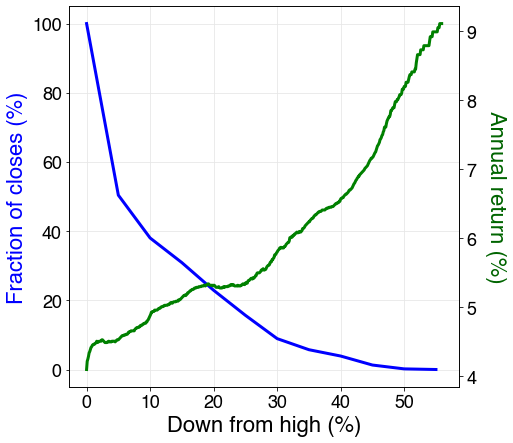

In [56]:
# plot line of return vs. dip buy

### PLOT S&P 500 data
fig, ax = plt.subplots(1, 1, figsize = (7,7))
ax2 = ax.twinx()

# buy opportunities
x = fract_pct_off['percent off']
y = fract_pct_off['fraction of days (%)']
ax.plot(-x, y, 'blue', linewidth=3, zorder=99)
ax.set_xlabel('Down from high (%)', fontsize = 22, fontname = 'Helvetica', fontweight = 'bold')
ax.set_ylabel('Fraction of closes (%)', fontsize = 22, c = 'blue', fontname = 'Helvetica', fontweight = 'bold')
# axes[0].set_ylim(-1,105)

# returns
x2 = return_vs_dip_buy['dip']
y2 = return_vs_dip_buy['ROI/y']
ax2.plot(x2, y2, 'green', linewidth=3, zorder=15)
ax2.set_xlabel('Buy when below (%)', fontsize = 22, fontname = 'Helvetica', fontweight = 'bold')
ax2.set_ylabel('Annual return (%)', fontsize = 22, c = 'darkgreen', fontname = 'Helvetica', fontweight = 'bold', labelpad= 30, rotation=270)
# axes[0].set_ylim(-1,105)

# set axis tick label properties
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=18, fontname = 'Helvetica')
plt.setp(ax.get_yticklabels(), fontsize=18, fontname = 'Helvetica')
plt.setp(ax2.get_yticklabels(), fontsize=18, fontname = 'Helvetica', rotation=0)

# turn grid on
ax.grid(color=(.9, .9, .9)); 

figure_name = './images/roi_vs_dip_buy_since_' + str(year) + '.png'

plt.savefig(figure_name, dpi = 250)
plt.subplots_adjust(wspace=0.25)
plt.show()

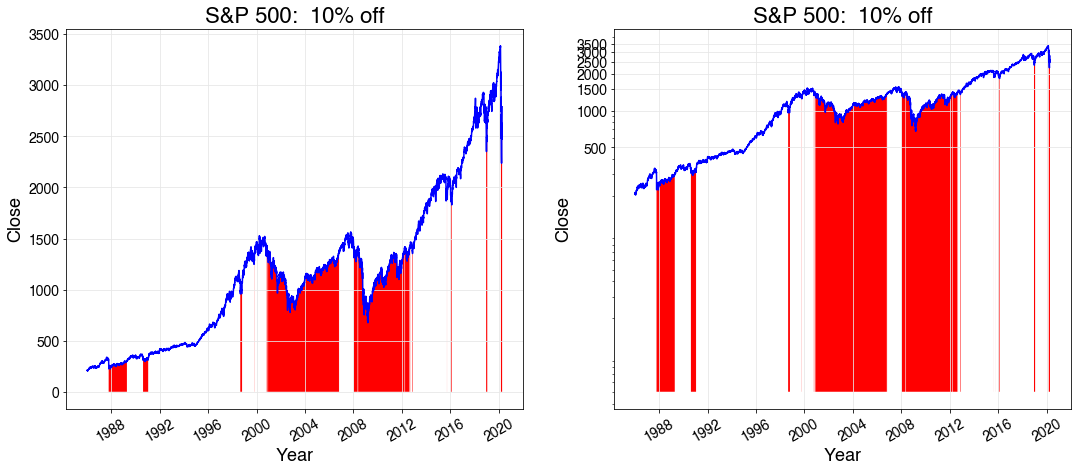

In [369]:
# create visual display of buying dips

# get buy dates
n = 10
sp_with_buy_dates = sp_diffs.copy()
sp_with_buy_dates['buy'] = sp_diffs['off from high'] < -n

# linear scale
fig, axes = plt.subplots(1, 2, figsize = (18,7))
x = sp['date']
y = sp['close']
axes[0].plot(x, y, 'blue')
axes[0].set_xlabel('Year', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[0].set_ylabel('Close', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[0].fill_between(x=sp_with_buy_dates['date'], y1=sp_with_buy_dates['close'], y2=0, facecolor='r', where=sp_with_buy_dates['buy']==True)

# log scale
axes[1].plot(x, y, 'blue')
axes[1].set_xlabel('Year', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_ylabel('Close', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_yscale('log')
axes[1].set_yticks(np.arange(500,3501,500))
axes[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axes[1].fill_between(x=sp_with_buy_dates['date'], y1=sp_with_buy_dates['close'], y2=5, facecolor='r', where=sp_with_buy_dates['buy']==True)

# set axis tick label properties
plt.setp(axes[0].get_xticklabels(), rotation=30, fontsize=14, fontname = 'Helvetica')
plt.setp(axes[1].get_xticklabels(), rotation=30, fontsize=14, fontname = 'Helvetica')
plt.setp(axes[0].get_yticklabels(), fontsize=14, fontname = 'Helvetica')
plt.setp(axes[1].get_yticklabels(), fontsize=14, fontname = 'Helvetica')

# turn grid on
axes[0].grid(color=(.9, .9, .9))
axes[1].grid(color=(.9, .9, .9))

axes[0].set_title('S&P 500:  ' + str(n) + '% off', fontname='Helvetica', fontsize=22)
axes[1].set_title('S&P 500:  ' + str(n) + '% off', fontname='Helvetica', fontsize=22)

figure_name = './images/sp_lin_log_buy_dip_' + str(n) + '.png'
plt.savefig(figure_name, dpi = 250)
plt.show()

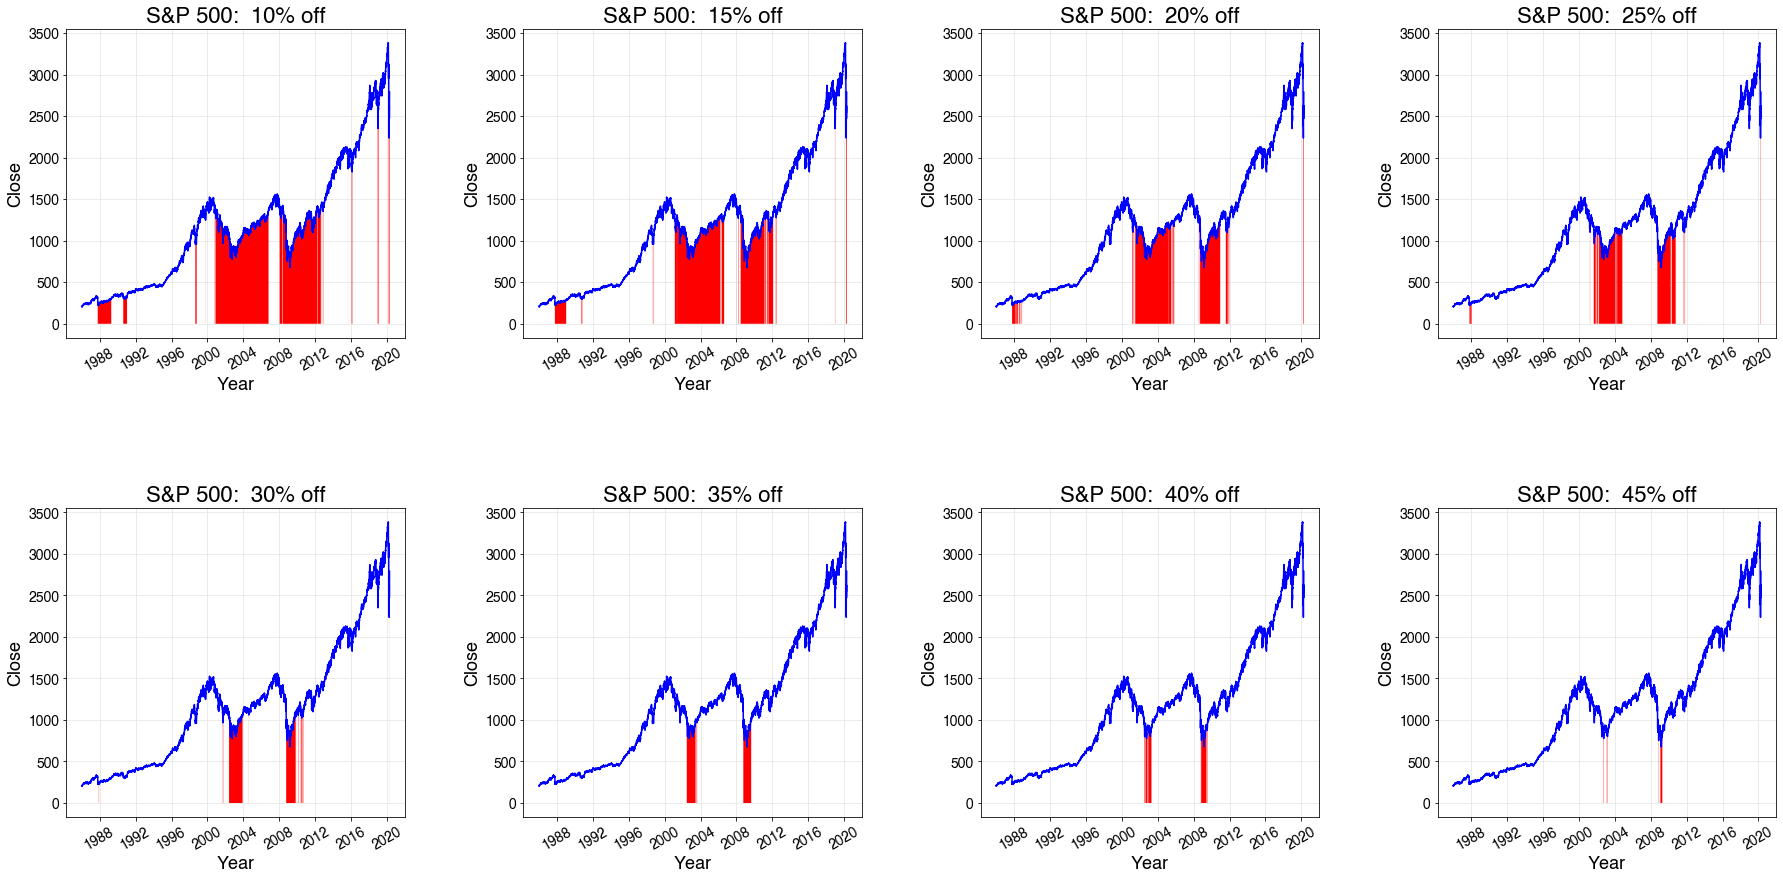

In [57]:
# create visual display of buying dips - linear scale only

# get buy dates
start = 10
stop = 45
step = 5
sp_with_buy_dates = sp_diffs.copy()
sp_with_buy_dates['buy'] = sp_diffs['off from high'] < -n

# linear scale
nrow = 2
ncol = 4
fig, axes = plt.subplots(nrow, ncol, figsize = (25,15))

# loop over dip buy options
for counter, i in enumerate(np.arange(start, stop+1, step)):

    # get buy dates
    sp_with_buy_dates['buy'] = sp_diffs['off from high'] < -i

    x = sp['date']
    y = sp['close']
    axes[counter//ncol, counter%ncol].plot(x, y, 'blue')
    axes[counter//ncol, counter%ncol].set_xlabel('Year', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
    axes[counter//ncol, counter%ncol].set_ylabel('Close', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
    axes[counter//ncol, counter%ncol].fill_between(x=sp_with_buy_dates['date'], y1=sp_with_buy_dates['close'], y2=0, facecolor='r', where=sp_with_buy_dates['buy']==True)

    # set axis tick label properties
    plt.setp(axes[counter//ncol, counter%ncol].get_xticklabels(), rotation=30, fontsize=14, fontname = 'Helvetica')
    plt.setp(axes[counter//ncol, counter%ncol].get_yticklabels(), fontsize=14, fontname = 'Helvetica')

    # turn grid on
    axes[counter//ncol, counter%ncol].grid(color=(.9, .9, .9)); axes[counter//ncol, counter%ncol].set_axisbelow(True)
    axes[counter//ncol, counter%ncol].set_title('S&P 500:  ' + str(i) + '% off', fontname='Helvetica', fontsize=22)

plt.gcf().subplots_adjust(bottom=0.15, left = 0.035, right = 0.985)
plt.subplots_adjust(wspace=0.35, hspace=0.55)
figure_name = './images/sp_lin_buy_dip_composite_2.png'
plt.savefig(figure_name, dpi = 250)
plt.show()

### Buy selectively within a dip

In [58]:
# identify days where price is n% off high
n = 10
sp_buys = sp_diffs.copy()
sp_buys['dip'] = False

for index, row in sp_buys.iterrows():
    if sp_buys.at[index, 'off from high'] < -n:
        sp_buys.at[index, 'dip'] = True

In [59]:
# create running counter of number of record highs
sp_buys['highs to date'] = 0
counter = 0
for index, row in sp_buys.iterrows():
    if sp_buys.at[index, 'off from high'] == 0:
        counter += 1
    sp_buys.at[index, 'highs to date'] = counter    
sp_buys[:33]

,date,close,daily change,daily change pct,high to date,off from high,dip,highs to date
0,1986-01-02,209.59,NaN,NaN,209.59,0.000,False,1
1,1986-01-03,210.88,1.29,0.612,210.88,0.000,False,2
2,1986-01-06,210.65,-0.23,-0.109,210.88,-0.109,False,2
3,1986-01-07,213.80,3.15,1.473,213.80,0.000,False,3
4,1986-01-08,207.97,-5.83,-2.803,213.80,-2.727,False,3
5,1986-01-09,206.11,-1.86,-0.902,213.80,-3.597,False,3
6,1986-01-10,205.96,-0.15,-0.073,213.80,-3.667,False,3
7,1986-01-13,206.72,0.76,0.368,213.80,-3.312,False,3
8,1986-01-14,206.64,-0.08,-0.039,213.80,-3.349,False,3
9,1986-01-15,208.26,1.62,0.778,213.80,-2.591,False,3


In [ ]:
# create new columns describing buys

# initialize new columns
sp_buys['shares bought'] = 0
sp_buys['total shares'] = np.nan
sp_buys['total spent'] = np.nan
sp_buys['avg buy price'] = np.nan
sp_buys['current return'] = np.nan
sp_buys['total spent'].iloc[0] = 0

# loop over rows, buying first dip and subsequent drops
for index, row in sp_buys.iterrows():
    
    # buy first day of n% dip
    if sp_buys.at[index, 'dip'] == True and sp_buys.at[index-1, 'dip'] == False:
        sp_buys.at[index, 'shares bought'] = 1 
        
    # buy when share price is below last buy price
    if len(sp_buys[sp_buys['shares bought'] == 1]) > 0:
        last_buy_price = sp_buys[sp_buys['shares bought'] == 1].iloc[-1]['close']
#     if last_buy_price:
#         if sp_buys.at[index, 'close'] < last_buy_price:
#             sp_buys.at[index, 'shares bought'] = 1

In [69]:
sp_buys.iloc[450:460]

,date,close,daily change,daily change pct,high to date,off from high,dip,highs to date,shares bought,total shares,total spent,avg buy price,current return
450,1987-10-13,314.52,5.13,1.631,336.77,-6.607,False,80,0,NaN,NaN,NaN,NaN
451,1987-10-14,305.23,-9.29,-3.044,336.77,-9.365,False,80,0,NaN,NaN,NaN,NaN
452,1987-10-15,298.08,-7.15,-2.399,336.77,-11.489,True,80,1,NaN,NaN,NaN,NaN
453,1987-10-16,282.70,-15.38,-5.440,336.77,-16.055,True,80,0,NaN,NaN,NaN,NaN
454,1987-10-19,224.84,-57.86,-25.734,336.77,-33.236,True,80,0,NaN,NaN,NaN,NaN
455,1987-10-20,236.83,11.99,5.063,336.77,-29.676,True,80,0,NaN,NaN,NaN,NaN
456,1987-10-21,258.38,21.55,8.340,336.77,-23.277,True,80,0,NaN,NaN,NaN,NaN
457,1987-10-22,248.25,-10.13,-4.081,336.77,-26.285,True,80,0,NaN,NaN,NaN,NaN
458,1987-10-23,248.22,-0.03,-0.012,336.77,-26.294,True,80,0,NaN,NaN,NaN,NaN
459,1987-10-26,227.67,-20.55,-9.026,336.77,-32.396,True,80,0,NaN,NaN,NaN,NaN


In [63]:
# update shares bought, total shares, total spent, avg buy price, and current return columns        
sp_buys['total shares'] = sp_buys['shares bought'].cumsum()
# sp_buys['total spent'] = sp_buys['total shares']*


# sp_buys[sp_buys['dip'] == True].iloc[0]['shares bought'] = 1
# sp_buys['total spent'].iloc[0] = sp_buys['close'].iloc[0]
# sp_buys['avg buy price'].iloc[0] = sp_buys['close'].iloc[0]
# sp_buys['current return'].iloc[0] = 0
# sp_buys[:22]

# sp_buys[sp_buys['dip'] == True][:33]
# sp_buys.iloc[450:480]
sp_buys

,date,close,daily change,daily change pct,high to date,off from high,dip,highs to date,shares bought,total shares,total spent,avg buy price,current return
0,1986-01-02,209.59,NaN,NaN,209.59,0.000,False,1,0,0,0.0,NaN,NaN
1,1986-01-03,210.88,1.29,0.612,210.88,0.000,False,2,0,0,NaN,NaN,NaN
2,1986-01-06,210.65,-0.23,-0.109,210.88,-0.109,False,2,0,0,NaN,NaN,NaN
3,1986-01-07,213.80,3.15,1.473,213.80,0.000,False,3,0,0,NaN,NaN,NaN
4,1986-01-08,207.97,-5.83,-2.803,213.80,-2.727,False,3,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8634,2020-04-03,2488.65,-38.25,-1.537,3386.15,-26.505,True,671,0,52,NaN,NaN,NaN
8635,2020-04-06,2663.68,175.03,6.571,3386.15,-21.336,True,671,0,52,NaN,NaN,NaN
8636,2020-04-07,2659.41,-4.27,-0.161,3386.15,-21.462,True,671,0,52,NaN,NaN,NaN
8637,2020-04-08,2749.98,90.57,3.293,3386.15,-18.787,True,671,0,52,NaN,NaN,NaN


In [426]:
# buy all subsequent days that are cheaper than average buy price
for index, row in sp_buys.iterrows():
    if sp_buys.at[index, 'dip'] == True:
        print(index, row)
    
#     # find last non-NaN element in last buy price and total spent columns
#     last_buy_price = sp_buys['close'].iloc[sp_buys['shares bought'][sp_buys['shares bought'] != 0].index[-1]]
    
#     # if current price is less than last buy price, buy another share
#     if row['close'] < last_buy_price:
#         sp_buys.at[index, 'shares bought'] = 1        

# populate shares owned column
sp_buys['shares owned'] = sp_buys['shares bought'].cumsum()
sp_buys

452 date                1987-10-15 00:00:00
close                            298.08
daily change                      -7.15
daily change pct                 -2.399
high to date                     336.77
off from high                   -11.489
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 452, dtype: object
453 date                1987-10-16 00:00:00
close                             282.7
daily change                     -15.38
daily change pct                  -5.44
high to date                     336.77
off from high                   -16.055
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 4

1031 date                1990-01-30 00:00:00
close                            322.98
daily change                      -2.22
daily change pct                 -0.687
high to date                      359.8
off from high                   -10.233
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 1031, dtype: object
1170 date                1990-08-17 00:00:00
close                            327.83
daily change                      -4.56
daily change pct                 -1.391
high to date                     368.95
off from high                   -11.145
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name

2989 date                1997-10-27 00:00:00
close                            876.99
daily change                     -64.65
daily change pct                 -7.372
high to date                     983.12
off from high                   -10.795
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 2989, dtype: object
3190 date                1998-08-14 00:00:00
close                           1062.75
daily change                     -12.16
daily change pct                 -1.144
high to date                    1186.75
off from high                   -10.449
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name

Name: 3841, dtype: object
3842 date                2001-03-16 00:00:00
close                           1150.53
daily change                     -23.03
daily change pct                 -2.002
high to date                    1527.46
off from high                   -24.677
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 3842, dtype: object
3843 date                2001-03-19 00:00:00
close                           1170.81
daily change                      20.28
daily change pct                  1.732
high to date                    1527.46
off from high                   -23.349
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned      

Name: 4075, dtype: object
4076 date                2002-02-26 00:00:00
close                           1109.38
daily change                      -0.05
daily change pct                 -0.005
high to date                    1527.46
off from high                   -27.371
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 4076, dtype: object
4077 date                2002-02-27 00:00:00
close                           1109.89
daily change                       0.51
daily change pct                  0.046
high to date                    1527.46
off from high                   -27.338
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned      

4357 date                2003-04-08 00:00:00
close                            878.29
daily change                      -1.64
daily change pct                 -0.187
high to date                    1527.46
off from high                     -42.5
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 4357, dtype: object
4358 date                2003-04-09 00:00:00
close                            865.99
daily change                      -12.3
daily change pct                  -1.42
high to date                    1527.46
off from high                   -43.305
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name

Name: 4604, dtype: object
4605 date                2004-04-01 00:00:00
close                           1132.17
daily change                       5.96
daily change pct                  0.526
high to date                    1527.46
off from high                   -25.879
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 4605, dtype: object
4606 date                2004-04-02 00:00:00
close                           1141.81
daily change                       9.64
daily change pct                  0.844
high to date                    1527.46
off from high                   -25.248
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned      

4839 date                2005-03-08 00:00:00
close                           1219.43
daily change                      -5.88
daily change pct                 -0.482
high to date                    1527.46
off from high                   -20.166
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 4839, dtype: object
4840 date                2005-03-09 00:00:00
close                           1207.01
daily change                     -12.42
daily change pct                 -1.029
high to date                    1527.46
off from high                   -20.979
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name

5041 date                2005-12-22 00:00:00
close                           1268.12
daily change                       5.33
daily change pct                   0.42
high to date                    1527.46
off from high                   -16.979
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 5041, dtype: object
5042 date                2005-12-23 00:00:00
close                           1268.66
daily change                       0.54
daily change pct                  0.043
high to date                    1527.46
off from high                   -16.943
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name

5339 date                2007-03-05 00:00:00
close                           1374.12
daily change                     -13.05
daily change pct                  -0.95
high to date                    1527.46
off from high                   -10.039
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 5339, dtype: object
5524 date                2007-11-26 00:00:00
close                           1407.22
daily change                     -33.48
daily change pct                 -2.379
high to date                    1565.15
off from high                    -10.09
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name

5795 date                2008-12-22 00:00:00
close                            871.63
daily change                     -16.25
daily change pct                 -1.864
high to date                    1565.15
off from high                    -44.31
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 5795, dtype: object
5796 date                2008-12-23 00:00:00
close                            863.16
daily change                      -8.47
daily change pct                 -0.981
high to date                    1565.15
off from high                   -44.851
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name

Name: 6022, dtype: object
6023 date                2009-11-17 00:00:00
close                           1110.32
daily change                       1.02
daily change pct                  0.092
high to date                    1565.15
off from high                    -29.06
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 6023, dtype: object
6024 date                2009-11-18 00:00:00
close                            1109.8
daily change                      -0.52
daily change pct                 -0.047
high to date                    1565.15
off from high                   -29.093
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned      

6291 date                2010-12-10 00:00:00
close                            1240.4
daily change                        7.4
daily change pct                  0.597
high to date                    1565.15
off from high                   -20.749
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 6291, dtype: object
6292 date                2010-12-13 00:00:00
close                           1240.46
daily change                       0.06
daily change pct                  0.005
high to date                    1565.15
off from high                   -20.745
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name

6541 date                2011-12-07 00:00:00
close                           1261.01
daily change                       2.54
daily change pct                  0.201
high to date                    1565.15
off from high                   -19.432
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 6541, dtype: object
6542 date                2011-12-08 00:00:00
close                           1234.35
daily change                     -26.66
daily change pct                  -2.16
high to date                    1565.15
off from high                   -21.135
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name

8093 date                2018-02-08 00:00:00
close                              2581
daily change                    -100.66
daily change pct                   -3.9
high to date                    2872.87
off from high                    -10.16
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name: 8093, dtype: object
8128 date                2018-04-02 00:00:00
close                           2581.88
daily change                     -58.99
daily change pct                 -2.285
high to date                    2872.87
off from high                   -10.129
dip                                True
shares bought                         0
total spent                         NaN
avg buy price                       NaN
current return                      NaN
shares owned                          0
Name

,date,close,daily change,daily change pct,high to date,off from high,dip,shares bought,total spent,avg buy price,current return,shares owned
0,1986-01-02,209.59,NaN,NaN,209.59,0.000,False,0,NaN,NaN,NaN,0
1,1986-01-03,210.88,1.29,0.612,210.88,0.000,False,0,NaN,NaN,NaN,0
2,1986-01-06,210.65,-0.23,-0.109,210.88,-0.109,False,0,NaN,NaN,NaN,0
3,1986-01-07,213.80,3.15,1.473,213.80,0.000,False,0,NaN,NaN,NaN,0
4,1986-01-08,207.97,-5.83,-2.803,213.80,-2.727,False,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8634,2020-04-03,2488.65,-38.25,-1.537,3386.15,-26.505,True,0,NaN,NaN,NaN,0
8635,2020-04-06,2663.68,175.03,6.571,3386.15,-21.336,True,0,NaN,NaN,NaN,0
8636,2020-04-07,2659.41,-4.27,-0.161,3386.15,-21.462,True,0,NaN,NaN,NaN,0
8637,2020-04-08,2749.98,90.57,3.293,3386.15,-18.787,True,0,NaN,NaN,NaN,0


In [398]:
# populate total spent, averge buy price, and current return columns
for index, row in sp_buys[1:599].iterrows():
#     print(index)
#     sp_buys.at[index, 'total spent'] = sp_buys.at[index-1, 'total spent'] + (sp_buys.at[index, 'close'] * sp_buys.at[index, 'shares bought'])
    sp_buys.at[index, 'avg buy price'] = sp_buys.at[index, 'total spent'] / sp_buys.at[index, 'shares owned']
    sp_buys.at[index, 'current return'] = 100*(((sp_buys.at[index, 'shares owned'] * sp_buys.at[index, 'close']) / sp_buys.at[index, 'total spent']) - 1)
sp_buys[:199]

453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702


,date,close,daily change,daily change pct,high to date,off from high,shares bought,total spent,avg buy price,current return,shares owned
452,1987-10-15,298.08,-7.15,-2.399,336.77,-11.489,1,298.08,298.08,0.0,1
453,1987-10-16,282.70,-15.38,-5.440,336.77,-16.055,1,NaN,NaN,NaN,2
454,1987-10-19,224.84,-57.86,-25.734,336.77,-33.236,1,NaN,NaN,NaN,3
455,1987-10-20,236.83,11.99,5.063,336.77,-29.676,0,NaN,NaN,NaN,3
456,1987-10-21,258.38,21.55,8.340,336.77,-23.277,0,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...
646,1988-07-22,263.50,-3.16,-1.199,336.77,-21.757,0,NaN,NaN,NaN,4
647,1988-07-25,264.68,1.18,0.446,336.77,-21.406,0,NaN,NaN,NaN,4
648,1988-07-26,265.19,0.51,0.192,336.77,-21.255,0,NaN,NaN,NaN,4
649,1988-07-27,262.50,-2.69,-1.025,336.77,-22.054,0,NaN,NaN,NaN,4


In [ ]:
# find local extrema, create dataframes storing them
from scipy.signal import argrelextrema

order = 100
min_indices = argrelextrema(sp_diffs['close'].values, np.less_equal, order=order)[0]
max_indices = argrelextrema(sp_diffs['close'].values, np.greater_equal, order=order)[0]

min_dates = sp_diffs.iloc[min_indices]['date']
max_dates = sp_diffs.iloc[max_indices]['date']

mins = pd.DataFrame({'date': min_dates,
                     'close': sp_diffs['close'][min_indices]})

maxs = pd.DataFrame({'date': max_dates,
                     'close': sp_diffs['close'][max_indices]})

In [ ]:
### PLOT S&P 500 data with local extrema labeled

# linear scale
fig, axes = plt.subplots(1, 2, figsize = (18,7))
x = sp['date']
y = sp['close']
axes[0].plot(x, y, 'blue')
axes[0].set_xlabel('Year', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[0].set_ylabel('Close', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')

# log scale
import matplotlib
axes[1].plot(x, y, 'blue')
axes[1].set_xlabel('Year', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_ylabel('Close', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_yscale('log')
axes[1].set_yticks(np.arange(500,3501,500))
axes[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


# add labeled extrema
axes[0].scatter(mins['date'], mins['close'], c='r', edgecolor='k')
axes[0].scatter(maxs['date'], maxs['close'], c='g', edgecolor='k')
axes[1].scatter(mins['date'], mins['close'], c='r', edgecolor='k')
axes[1].scatter(maxs['date'], maxs['close'], c='g', edgecolor='k')

# set axis tick label properties
plt.setp(axes[0].get_xticklabels(), rotation=30, fontsize=14, fontname = 'Helvetica')
plt.setp(axes[1].get_xticklabels(), rotation=30, fontsize=14, fontname = 'Helvetica')
plt.setp(axes[0].get_yticklabels(), fontsize=14, fontname = 'Helvetica')
plt.setp(axes[1].get_yticklabels(), fontsize=14, fontname = 'Helvetica')

# turn grid on
axes[0].grid(color=(.9, .9, .9)); axes[0].set_axisbelow(True)
axes[1].grid(color=(.9, .9, .9)); axes[1].set_axisbelow(True)

figure_name = './images/sp_lin_log_extrema.png'

plt.savefig(figure_name, dpi = 250)

plt.show()

In [ ]:
sp_diffs

In [ ]:
# find all dates where current price is x% ('drop') less than a past price within given period of time ('window')
num = 10000
drop = 0.40
window = 50

# loop over all closing prices
drops = pd.DataFrame(columns = ['start date', 'start price', 'end date', 'end price', 'drop pct'])
                               
for counter_i, close in enumerate(sp_diffs['close'][:num]):
    
    # print status - year when searching early Jan
    if sp_diffs['date'].iloc[counter_i].date().month == 1 and sp_diffs['date'].iloc[counter_i].date().day < 4:
        print('***' + str(sp_diffs['date'].iloc[counter_i].date().year) + '***')
    
    # loop over all prices after this
    for counter_j, close in enumerate(sp_diffs['close'][:num]):
        
        # print dates within time window of peak x% higher
        if counter_j > counter_i and counter_j < window + counter_i and sp_diffs['close'].iloc[counter_i] > (1 + drop)*sp_diffs['close'].iloc[counter_j]:
                        
            # pull out important values
            start_date = sp_diffs['date'].iloc[counter_i].date()
            start_price = sp_diffs['close'].iloc[counter_i]
            end_date = sp_diffs['date'].iloc[counter_j].date()
            end_price = sp_diffs['close'].iloc[counter_j]
            drop_pct = round(100*(sp_diffs['close'].iloc[counter_i]/sp_diffs['close'].iloc[counter_j]-1),2)
            
#             # print them 
#             print(start_date, start_price, end_date, end_price, drop_pct)
            
            # create temporary dataframe
            drops_temp = pd.DataFrame({'start date': sp_diffs['date'].iloc[counter_i].date(),
                                        'start price': sp_diffs['close'].iloc[counter_i],
                                        'end date': sp_diffs['date'].iloc[counter_j].date(),
                                        'end price': sp_diffs['close'].iloc[counter_j],
                                        'drop pct': round(100*(sp_diffs['close'].iloc[counter_i]/sp_diffs['close'].iloc[counter_j]-1),2)}, index=[0])
            
            
            # add entry to growing dataframe, provided start and end dates are not already in there
            if start_date not in [item for item in drops['start date']] and end_date not in [item for item in drops['end date']]:
                drops = drops.append(drops_temp, ignore_index=True)

In [ ]:
drops